In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [4]:
data_train = pd.read_csv("./data/train.csv", index_col=0)
data_test = pd.read_csv('./data/test.csv', index_col=0)

In [110]:
data_test

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,
29306,18,?,245274,10,Never-married,?,Own-child,White,0,0,0,16,United-States
29307,29,Private,83003,9,Married-civ-spouse,Other-service,Wife,White,1,0,0,40,United-States
29308,45,Private,35136,13,Married-civ-spouse,Tech-support,Husband,Black,0,0,0,40,United-States
29309,42,Self-emp-not-inc,64631,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,40,United-States
29310,41,Private,195821,16,Married-civ-spouse,Exec-managerial,Wife,White,1,0,1902,40,United-States
29311,17,Private,25690,6,Never-married,Other-service,Own-child,White,1,0,0,10,United-States
29312,34,Local-gov,284843,9,Never-married,Farming-fishing,Not-in-family,Black,0,594,0,60,United-States
29313,22,Self-emp-inc,120753,13,Never-married,Sales,Own-child,White,0,0,0,50,United-States
29314,35,Private,127306,11,Never-married,Adm-clerical,Own-child,White,1,14344,0,40,United-States


In [114]:
data_train[data_train['native-country']==' United-States']['income'].value_counts()

0    19834
1     6467
Name: income, dtype: int64

In [117]:
6467 / (19834 + 6467)

0.24588418691304514

In [115]:
data_train[data_train['native-country']!=' United-States']['income'].value_counts()

0    2426
1     578
Name: income, dtype: int64

In [118]:
576 / (576 + 2426)

0.19187208527648233

# education 삭제

In [75]:
# education 열은 education으로 대체 가능
data_train_ana = data_train.sort_values('education-num').loc[:,'education':'education-num']
data_train_ana.drop_duplicates()

,education,education-num
no,,
28002,Preschool,1
24026,1st-4th,2
7909,5th-6th,3
19345,7th-8th,4
12340,9th,5
3659,10th,6
5992,11th,7
19551,12th,8
11362,HS-grad,9


In [76]:
# data_train, data_test의 education 열 삭제
data_train.drop(['education'], axis=1, inplace=True)
data_test.drop(['education'], axis=1, inplace=True)

In [77]:
# 수정 사항 확인
data_train.head()
data_test.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,
29306,18,?,245274,10,Never-married,?,Own-child,White,Male,0,0,16,United-States
29307,29,Private,83003,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
29308,45,Private,35136,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
29309,42,Self-emp-not-inc,64631,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
29310,41,Private,195821,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States


In [78]:
data_train.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,
1,25,Private,219199,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


In [17]:
data_train['marital-status'].value_counts()

 Married-civ-spouse       13331
 Never-married             9673
 Divorced                  4030
 Widowed                    942
 Separated                  914
 Married-spouse-absent      394
 Married-AF-spouse           21
Name: marital-status, dtype: int64

In [25]:
import matplotlib.pyplot as plt

In [58]:
data_train[data_train['income']==0]['marital-status'].value_counts().values

array([9220, 7346, 3609,  863,  852,  357,   13], dtype=int64)

In [59]:
data_train[data_train['income']==1]['marital-status'].value_counts().values

array([5985,  453,  421,   79,   62,   37,    8], dtype=int64)

In [60]:
data_train[data_train['income']==0]['marital-status'].value_counts().keys()

Index([' Never-married', ' Married-civ-spouse', ' Divorced', ' Widowed',
       ' Separated', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype='object')

In [61]:
data_train[data_train['income']==1]['marital-status'].value_counts().keys()

Index([' Married-civ-spouse', ' Never-married', ' Divorced', ' Widowed',
       ' Separated', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype='object')

## Married-civ-spouse와 Never-married를 포함한 나머지로 두 그룹 생성
- 'marital-status' 통합

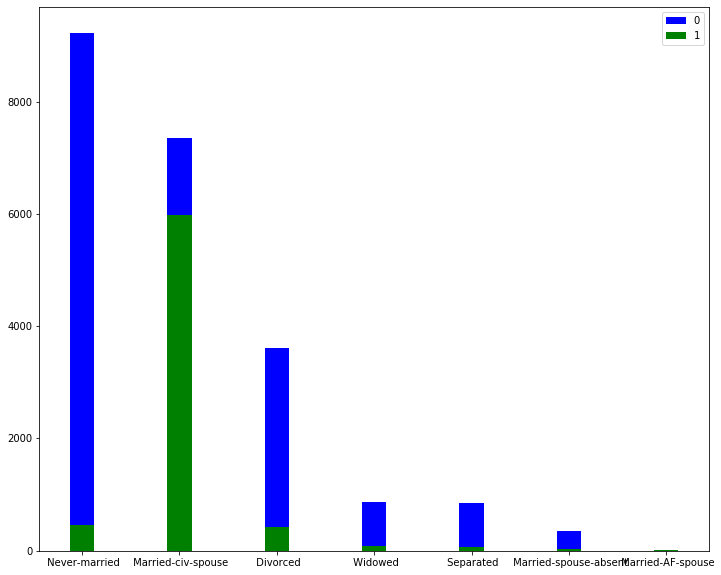

In [64]:
plt.figure(figsize=(12,10))
plt.bar(data_train[data_train['income']==0]['marital-status'].value_counts().keys(), data_train[data_train['income']==0]['marital-status'].value_counts().values, color = 'b', width = 0.25, label='0')
plt.bar( data_train[data_train['income']==1]['marital-status'].value_counts().keys(), data_train[data_train['income']==1]['marital-status'].value_counts().values, color = 'g', width = 0.25, label='1')
plt.legend()

## relationship 관계

In [65]:
data_train[data_train['income'] == 0]['relationship'].value_counts()

 Not-in-family     6834
 Husband           6449
 Own-child         4489
 Unmarried         2885
 Other-relative     872
 Wife               731
Name: relationship, dtype: int64

In [66]:
data_train[data_train['income'] == 1]['relationship'].value_counts()

 Husband           5320
 Not-in-family      803
 Wife               639
 Unmarried          186
 Own-child           65
 Other-relative      32
Name: relationship, dtype: int64

In [69]:
relation_income1 = data_train[data_train['income'] == 1]['relationship'].value_counts()
relation_income0 = data_train[data_train['income'] == 0]['relationship'].value_counts()

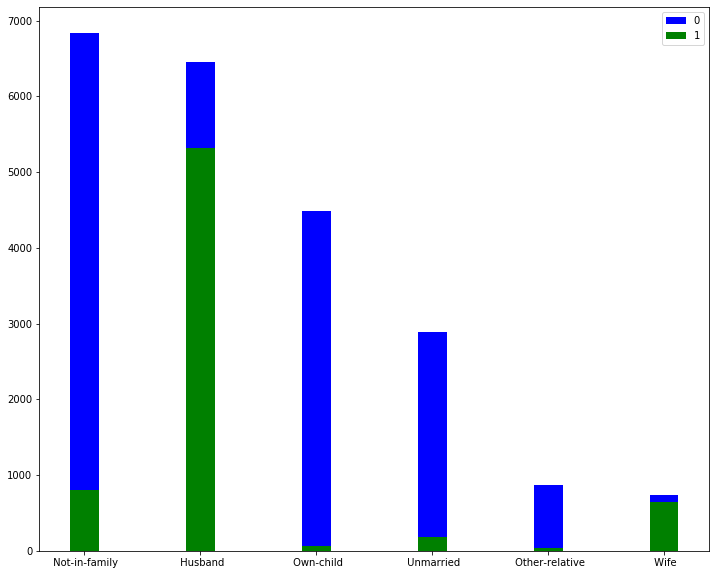

In [70]:
plt.figure(figsize=(12,10))
plt.bar(relation_income0.keys(), relation_income0.values, color = 'b', width = 0.25, label='0')
plt.bar(relation_income1.keys(), relation_income1.values, color = 'g', width = 0.25, label='1')
plt.legend()

## Husband와 Not-in-family를 포함한 나머지로 두 그룹 생성
- 'marital-status' 통합

In [5]:
relation_income1 = data_train[data_train['income'] == 1]['race'].value_counts()
relation_income0 = data_train[data_train['income'] == 0]['race'].value_counts()

In [6]:
plt.figure(figsize=(12,10))
plt.bar(relation_income0.keys(), relation_income0.values, color = 'b', width = 0.25, label='0')
plt.bar(relation_income1.keys(), relation_income1.values, color = 'g', width = 0.25, label='1')
plt.legend()

NameError: name 'plt' is not defined

# 성별 숫자 전환

In [104]:
# train
data_train.loc[:, 'sex'].replace(' Male', 0, inplace=True)
data_train.loc[:, 'sex'].replace(' Female', 1, inplace=True)
# test
data_test.loc[:, 'sex'].replace(' Male', 0, inplace=True)
data_test.loc[:, 'sex'].replace(' Female', 1, inplace=True)

In [106]:
# 수정사항 확인
data_test.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,
29306,18,?,245274,10,Never-married,?,Own-child,White,0,0,0,16,United-States
29307,29,Private,83003,9,Married-civ-spouse,Other-service,Wife,White,1,0,0,40,United-States
29308,45,Private,35136,13,Married-civ-spouse,Tech-support,Husband,Black,0,0,0,40,United-States
29309,42,Self-emp-not-inc,64631,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,40,United-States
29310,41,Private,195821,16,Married-civ-spouse,Exec-managerial,Wife,White,1,0,1902,40,United-States


In [98]:
X_train = data_train[['age', 'fnlwgt', 'education-num', 'sex', 'hours-per-week']]
y_train = data_train['income']

In [107]:
X_train = data_train[['age', 'education-num', 'sex', 'hours-per-week']]
y_train = data_train['income']

In [100]:
X_train.shape

(29305, 4)

In [101]:
y_train.shape

(29305,)

## train dataset에서 분리하여 성능 평가

In [86]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1, stratify=y_train)

In [88]:
X_train.shape

(20513, 4)

In [89]:
y_train.shape

(20513,)

In [16]:
X_test.shape

(8792, 4)

In [17]:
y_test.shape

(8792,)

In [123]:
# ['age', 'fnlwgt', 'education-num', 'sex', 'hours-per-week'] 사용
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print(i, knn.score(X_test, y_test))

1 0.680277525022748
2 0.7402183803457689
3 0.7064376706096451
4 0.740673339399454
5 0.7194040036396724
6 0.7443130118289354
7 0.7292993630573248
8 0.74647406733394
9 0.7381710646041856
10 0.75
11 0.7434030937215651
12 0.7530709736123748
13 0.7478389444949954
14 0.752729754322111
15 0.7509099181073703
16 0.7550045495905369
17 0.7525022747952684
18 0.756255686988171
19 0.7559144676979072
20 0.7564831665150137
21 0.7560282074613285
22 0.7568243858052776
23 0.7567106460418562
24 0.7579617834394905
25 0.7578480436760692
26 0.7588717015468608
27 0.758189262966333
28 0.7588717015468608
29 0.7585304822565969


In [106]:
# ['age', 'education-num', 'sex', 'hours-per-week'] 사용
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print(i, knn.score(X_test, y_test))

1 0.7399909008189263
2 0.7777525022747953
3 0.7681983621474068
4 0.7825295723384895
5 0.7783212010919017
6 0.7900363967242948
7 0.7890127388535032
8 0.7871929026387625
9 0.7903776160145587
10 0.7886715195632393
11 0.788557779799818
12 0.7960646041856233
13 0.7914012738853503
14 0.7939035486806187
15 0.7901501364877161
16 0.795950864422202
17 0.7919699727024567
18 0.7974294813466788
19 0.796747042766151
20 0.8017515923566879
21 0.7989080982711556
22 0.7995905368516834
23 0.8000454959053686
24 0.7977707006369427
25 0.796747042766151
26 0.7986806187443131
27 0.7960646041856233
28 0.7969745222929936
29 0.7972020018198362


# ['age', 'education-num', 'sex', 'hours-per-week']를 사용하여 SVM 사용

In [79]:
from sklearn.svm import SVC

In [96]:
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test, y_test)))

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


ValueError: could not convert string to float: ' Male'

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print('스케일 조정된 테스트 세트의 정확도 : {:.2f}'.format(svm.score(X_test_scaled, y_test)))

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


스케일 조정된 테스트 세트의 정확도 : 0.81


In [ ]:
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train, y_train)
print(svm.score(X_test, y_test))

'age', **'fnlwgt'**, 'education-num', 'sex', 'hours-per-week' 사용시 75%까지 감소

## '나이', '성별', '교육 수준', '주간 근무시간'으로 구한 결과

In [64]:
X_test = data_test[['age','education-num','sex','hours-per-week']]

In [73]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pre = knn.predict(X_test)

In [65]:
X_test

,age,education-num,sex,hours-per-week
no,,,,
29306,18,10,0,16
29307,29,9,1,40
29308,45,13,0,40
29309,42,13,0,40
29310,41,16,1,40
29311,17,6,1,10
29312,34,9,0,60
29313,22,13,0,50
29314,35,11,1,40


In [74]:
pre

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## 결측치:
- workclass
- occupation
- native-country
- never worked 와 without pay는 같은 취급
- education은 education num으로 통합

In [3]:
data_train[(data_train['workclass'] != ' ?') & (data_train['occupation'] == ' ?')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
4060,17,Never-worked,131593,11th,7,Never-married,?,Own-child,Black,Female,0,0,20,United-States,0
9899,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,0
11468,18,Never-worked,162908,11th,7,Never-married,?,Own-child,White,Male,0,0,35,United-States,0
18423,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,0
22248,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,0


>직군이 없는 사람은 직업도 없지만 <br>
직업이 없는 사람 중 직군이 Never-worked인 경우가 존재

In [4]:
data_train[(data_train['native-country'] == ' ?')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
26,45,Private,179048,12th,8,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,?,1
297,47,?,174525,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,3942,0,40,?,0
306,25,Private,124111,Bachelors,13,Never-married,Sales,Own-child,White,Female,0,0,36,?,0
422,35,?,103710,Bachelors,13,Divorced,?,Unmarried,White,Female,0,0,16,?,0
433,29,Private,112403,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,?,0
479,41,Private,90021,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,?,0
583,28,Private,213152,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,?,1
678,24,Private,330724,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,16,?,0
781,56,Private,68080,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,?,1


## native country는 제외

In [5]:
data_train.shape

(29305, 15)

In [6]:
data_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,,
29306,18,?,245274,Some-college,10,Never-married,?,Own-child,White,Male,0,0,16,United-States
29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States


In [7]:
for i in data_train.columns:
    print(i, len(data_train[data_train[i] == ' ?']))

age 0
workclass 1663
fnlwgt 0
education 0
education-num 0
marital-status 0
occupation 1668
relationship 0
race 0
sex 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 495
income 0


C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [8]:
data_train.drop('workclass', inplace=True, axis=1)
data_train.drop('occupation', inplace=True, axis=1)
data_train.drop('native-country', inplace=True, axis=1)
data_train.drop('education', inplace=True, axis=1)
data_train.drop('fnlwgt', inplace=True, axis=1)

data_train.drop('capital-gain', inplace=True, axis=1)
data_train.drop('capital-loss', inplace=True, axis=1)

In [9]:


data_test.drop('capital-gain', inplace=True, axis=1)
data_test.drop('capital-loss', inplace=True, axis=1)

In [10]:
data_test.drop('workclass', inplace=True, axis=1)
data_test.drop('occupation', inplace=True, axis=1)
data_test.drop('native-country', inplace=True, axis=1)
data_test.drop('fnlwgt', inplace=True, axis=1)
data_test.drop('education', inplace=True, axis=1)


In [18]:
data_train

,age,education-num,marital-status,relationship,race,sex,hours-per-week,income
no,,,,,,,,
1,25,7,Divorced,Not-in-family,White,Male,40,0
2,39,10,Divorced,Not-in-family,White,Female,55,0
3,35,13,Never-married,Not-in-family,Asian-Pac-Islander,Female,50,0
4,64,11,Divorced,Not-in-family,White,Female,40,0
5,24,10,Married-civ-spouse,Husband,White,Male,70,1
6,66,5,Married-civ-spouse,Husband,White,Male,25,1
7,56,13,Divorced,Unmarried,Black,Female,40,0
8,70,9,Married-civ-spouse,Husband,White,Male,40,0
9,21,11,Married-civ-spouse,Other-relative,White,Female,50,0


In [17]:
import seaborn as sns

C:\Users\bigBro\Anaconda3\envs\bigdata\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\bigBro\Anaconda3\envs\bigdata\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


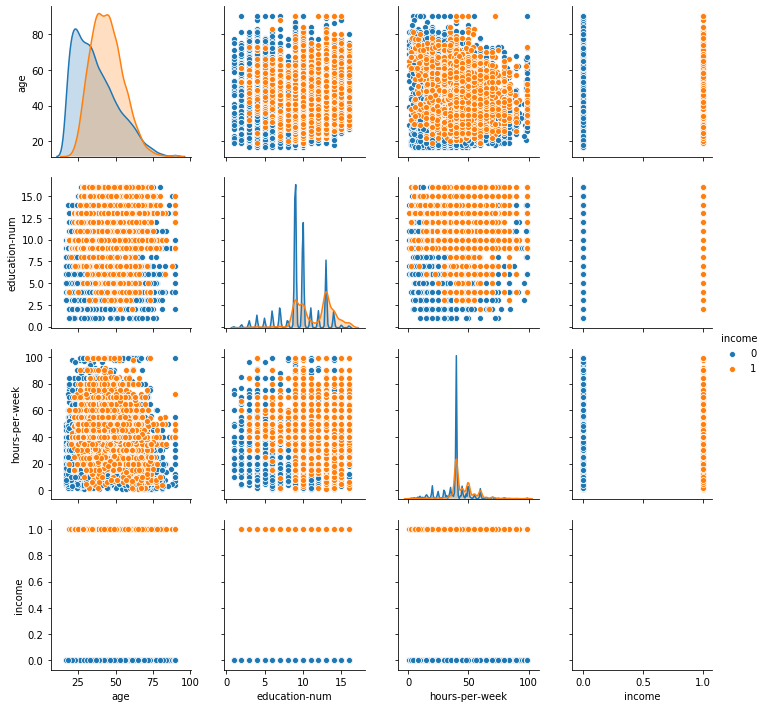

In [19]:
sns.pairplot(data_train, hue="income")

In [20]:
data_train.columns

Index(['age', 'education-num', 'marital-status', 'relationship', 'race', 'sex',
       'hours-per-week', 'income'],
      dtype='object')

In [22]:
import matplotlib.pyplot as plt

TypeError: '(slice(None, None, None), 0)' is an invalid key

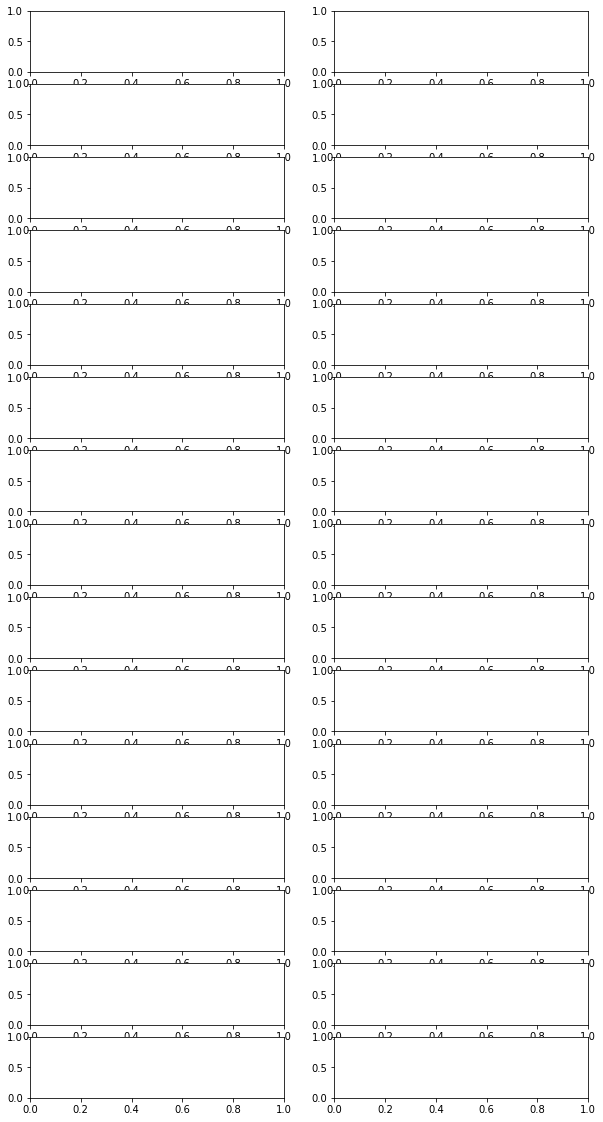

In [26]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
rich = data_train[data_train['income'] == 1]
poor = data_train[data_train['income'] == 0]

ax = axes.ravel()

for i in range(len(data_train.columns)):
    _, bins = np.histogram(data_train[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(data_train.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["0", "1"], loc="best")
fig.tight_layout()

In [12]:
data_train['race'].value_counts()

 White                 25081
 Black                  2776
 Asian-Pac-Islander      919
 Amer-Indian-Eskimo      290
 Other                   239
Name: race, dtype: int64

In [13]:
X_train, y_train = data_train.iloc[:, :-1], data_train.iloc[:, -1] 

In [14]:
X_train.shape

(29305, 7)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(data_test)

ValueError: could not convert string to float: ' Divorced'

In [ ]:
svm.predict()